In [1]:
import numpy as np

In [2]:
from scipy.signal import StateSpace, lsim
import matplotlib.pyplot as plt
from numpy import linalg as LA

We have d=2 and k=2 and two Markov states with same cost matrices Q and R which are symmetric and positive semidefinite.

Firstly we generate these matrices Q and R.

In [3]:
a=np.random.rand(2)
b=np.random.rand(2)
a,b

(array([0.31127488, 0.76253165]), array([0.98834415, 0.85177761]))

In [4]:
Q=np.outer(a,a)
R=np.outer(b,b)

pd1=0.5*np.random.rand(1)
pd2=0.5*np.random.rand(1)

I=np.array([[1,0],[0,1]])

Q=Q+pd1*I
R=R+pd2*I


In [5]:
A=np.random.rand(2,2)
B=np.random.rand(2,2)
A2=np.random.rand(2,2)
B2=np.random.rand(2,2)
var1=0.5*np.random.rand(1)
var2=0.5*np.random.rand(1)
K=np.random.rand(2,2)

In [6]:
scale=0.2
K=scale*K
A=scale*A
B=scale*B
var1=scale*scale*var1
var2=scale*scale*var2
LA.norm(A+B.dot(K),2)

0.20924424932401517

In [7]:
time=np.arange(0,10,1e-3)
time.shape

(10000,)

In [8]:
x_dynamics=np.zeros((2,time.shape[0]))
x_0=np.random.rand(2)
x_dynamics[:,0]=x_0
x_dynamics


array([[0.62508691, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.96229483, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
x_0

array([0.62508691, 0.96229483])

In [10]:
u_0=K.dot(x_0)

Now we run the simulation storing the state dynamics in x_dynamics and costs in the vector cost

In [11]:
cost=np.zeros((time.shape[0]))
x_norm=np.zeros((time.shape[0]))

In [12]:
c_0=x_0.dot((Q.dot(x_0)))+u_0.dot((R.dot(u_0)))

In [13]:
cost[0]=c_0
x_norm[0]=LA.norm(x_0,2)

In [14]:
for t in range(1,time.shape[0]):
    xprev=x_dynamics[:,t-1]
    uprev=K.dot(xprev)
    xt=A.dot(xprev)+B.dot(uprev)+np.random.normal(0,var1,xprev.shape)
    ut=K.dot(xt)
    ct=xt.dot(Q.dot(xt))+ut.dot(R.dot(ut))
    c=(cost[t-1]*(t)+ct)/(t+1)
    x_norm[t]=LA.norm(xt,2)
    cost[t]=c
    x_dynamics[:,t]=xt
    
Final_Cost=(cost[time.shape[0]-1]*(time.shape[0])+x_dynamics[:,time.shape[0]-1].dot(Q.dot(x_dynamics[:,time.shape[0]-1])))/(time.shape[0]+1)



In [15]:
Final_Cost

0.00011548122191469451

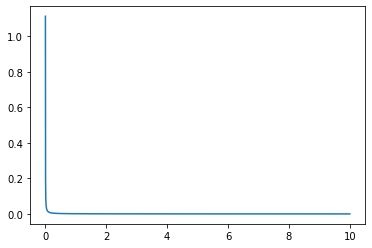

In [16]:
plt.plot(time,cost)

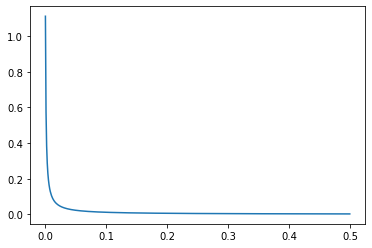

In [17]:
plt.plot(time[0:500],cost[0:500])

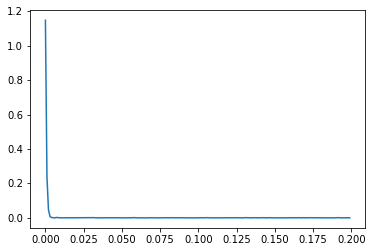

In [18]:
plt.plot(time[0:200],x_norm[0:200])

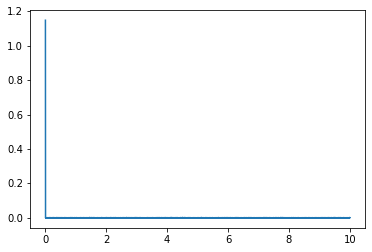

In [19]:
plt.plot(time,x_norm)

In [20]:
#Ricatti Solver and testing the average cost with this

Opt_x_dynamics=np.zeros((2,time.shape[0]))
Opt_x_0=np.random.rand(2)
Opt_x_dynamics[:,0]=Opt_x_0
Opt_x_dynamics
Opt_cost=np.zeros((time.shape[0]))
Opt_x_norm=np.zeros((time.shape[0]))

## Opt_c_0=Opt_x_0.dot((Q.dot(Opt_x_0)))+Opt_u_0.dot((R.dot(Opt_u_0))) This line will appear after we have Opt_u_0 from K_0 after Dynamic Programming




In [21]:
# Dynamic Programming for Riccati Solver Policies


P=np.zeros((time.shape[0],2,2))
K=np.zeros((time.shape[0],2,2))
#zero_init=np.zeros((2,2))
for t in range((time.shape[0])):
    P[t]=np.zeros((2,2))
    K[t]=np.zeros((2,2))
P[time.shape[0]-1]=Q
K[time.shape[0]-1]=np.dot(np.dot(np.dot(np.linalg.inv(R+np.dot(np.dot(B.T,Q),B)),B.T),Q),A)

for t in range(1,time.shape[0]):
    P[time.shape[0]-t-1]=Q+np.dot(A.T,np.dot(P[time.shape[0]-t],A))-np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(A.T,P[time.shape[0]-t].T),B),np.linalg.inv(R+np.dot(B.T,np.dot(P[time.shape[0]-t],B)))),B.T),P[time.shape[0]-t]),A)
    K[time.shape[0]-t-1]=np.dot(np.dot(np.dot(np.linalg.inv(R+np.dot(np.dot(B.T,P[time.shape[0]-t]),B)),B.T),P[time.shape[0]-t]),A)


In [22]:
#Now we run the Riccati Optimal Policies

#First some initializations

Opt_u_0= -K[0].dot(Opt_x_0)

Opt_c_0=Opt_x_0.dot((Q.dot(Opt_x_0)))+Opt_u_0.dot((R.dot(Opt_u_0)))

cost[0]=c_0
x_norm[0]=LA.norm(x_0,2)
Opt_cost[0]=Opt_c_0
Opt_x_norm[0]=LA.norm(Opt_x_0,2)

#Now we simulate the Linear Dynamical System, this time playing optimally using Riccati Policies


for t in range(1,time.shape[0]):
    xprev=Opt_x_dynamics[:,t-1]
    uprev=K[t-1].dot(xprev)
    xt=A.dot(xprev)+B.dot(uprev)+np.random.normal(0,var1,xprev.shape)
    ut=-K[t].dot(xt)
    ct=xt.dot(Q.dot(xt))+ut.dot(R.dot(ut))
    c=(Opt_cost[t-1]*(t)+ct)/(t+1)
    Opt_x_norm[t]=LA.norm(xt,2)
    Opt_cost[t]=c
    Opt_x_dynamics[:,t]=xt
    
Opt_Final_Cost=(Opt_cost[time.shape[0]-1]*(time.shape[0])+Opt_x_dynamics[:,time.shape[0]-1].dot(Q.dot(Opt_x_dynamics[:,time.shape[0]-1])))/(time.shape[0]+1)





In [23]:
Opt_Final_Cost

4.457208030636714e-05

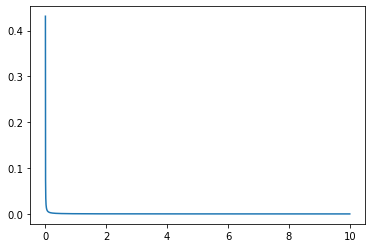

In [24]:
plt.plot(time,Opt_cost)

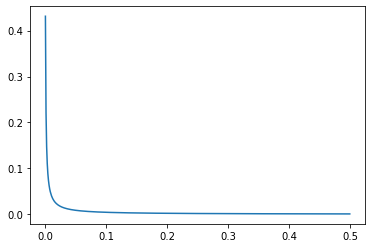

In [25]:
plt.plot(time[0:500],Opt_cost[0:500])

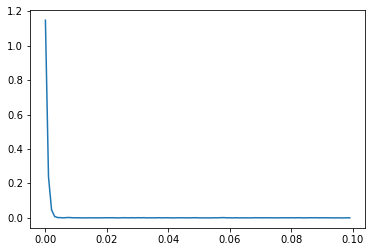

In [26]:
plt.plot(time[0:100],x_norm[0:100])

In [27]:
Final_Cost

0.00011548122191469451

In [28]:
Opt_Final_Cost

4.457208030636714e-05